In [105]:
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import compress

In [76]:
intensity = mne.io.read_raw_snirf("data/steve-scan5-Sep-18-2023-9-09-PM-real.snirf")
annots = pd.read_csv("data/steve-scan5-Sep-18-2023-9-09-PM-real_events.txt", sep="\t")
onsets = annots.Onset.tolist()
annots[:10]

Loading /Users/andru/Projects/signal-classifier/data/steve-scan5-Sep-18-2023-9-09-PM-real.snirf


,Onset,Duration,Amplitude,trial_type
0,163.300000,0,1,1
1,169.637682,0,1,rest
2,199.649507,0,1,right
3,204.755888,0,1,rest
4,219.534319,0,1,left
5,224.639433,0,1,rest
6,240.558089,0,1,right
7,245.661940,0,1,rest
8,261.183845,0,1,left
9,266.290194,0,1,rest


In [80]:
idx_to_type = list(set(annots.trial_type))
type_to_idx = {type_:idx for idx, type_ in enumerate(idx_to_type)}
print(type_to_idx)

{'rest': 0, 'left': 1, '1': 2, 'right': 3, 'end': 4}


In [81]:
durations = list(np.array(onsets[1:]) - np.array(onsets[:-1])) + [0]

In [82]:
annots = mne.Annotations(
    onset=onsets,  # in seconds
    duration=durations,  # in seconds, too
    description=annots.trial_type.tolist(),
)

In [83]:
intensity.set_annotations(annots)

<RawSNIRF | steve-scan5-Sep-18-2023-9-09-PM-real.snirf, 32 x 6195 (619.4 s), ~49 kB, data not loaded>

In [88]:
(events_from_annot, event_dict) = mne.events_from_annotations(
    intensity, event_id=type_to_idx)
print(event_dict)
print(events_from_annot[:5])

Used Annotations descriptions: ['1', 'end', 'left', 'rest', 'right']
{'1': 2, 'end': 4, 'left': 1, 'rest': 0, 'right': 3}
[[1633    0    2]
 [1696    0    0]
 [1996    0    3]
 [2048    0    0]
 [2195    0    1]]


In [87]:
events_from_annot

array([[1633,    0,    2],
       [1696,    0,    0],
       [1996,    0,    3],
       [2048,    0,    0],
       [2195,    0,    1],
       [2246,    0,    0],
       [2406,    0,    3],
       [2457,    0,    0],
       [2612,    0,    1],
       [2663,    0,    0],
       [2819,    0,    3],
       [2870,    0,    0],
       [3025,    0,    1],
       [3076,    0,    0],
       [3223,    0,    3],
       [3275,    0,    0],
       [3433,    0,    1],
       [3485,    0,    0],
       [3631,    0,    3],
       [3682,    0,    0],
       [3826,    0,    1],
       [3876,    0,    0],
       [4031,    0,    3],
       [4083,    0,    0],
       [4233,    0,    1],
       [4284,    0,    0],
       [4442,    0,    3],
       [4493,    0,    0],
       [4648,    0,    1],
       [4699,    0,    0],
       [4848,    0,    3],
       [4899,    0,    0],
       [5045,    0,    1],
       [5095,    0,    0],
       [5249,    0,    3],
       [5300,    0,    0],
       [5457,    0,    1],
 

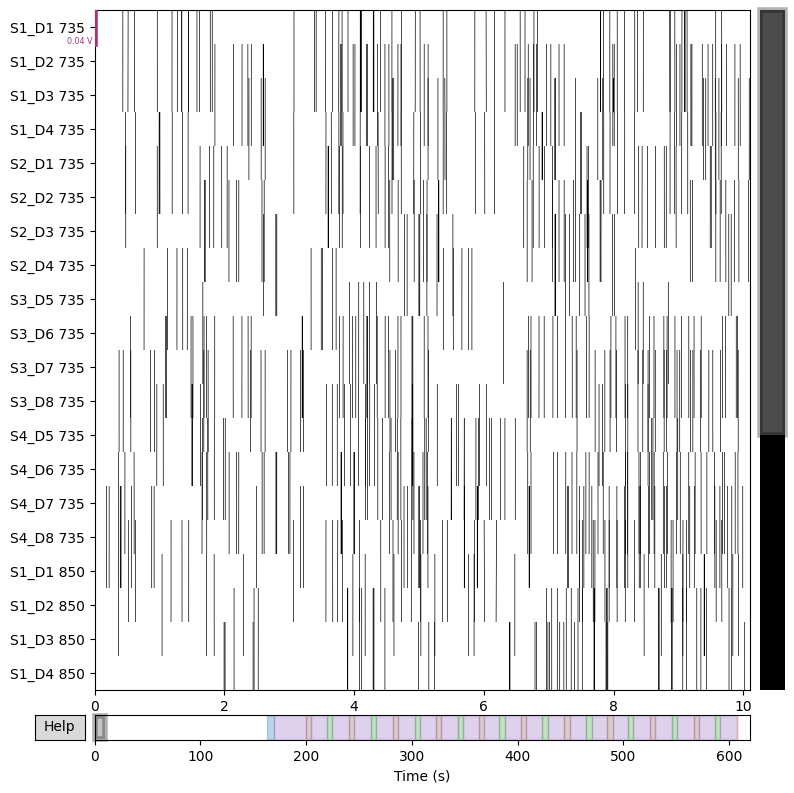

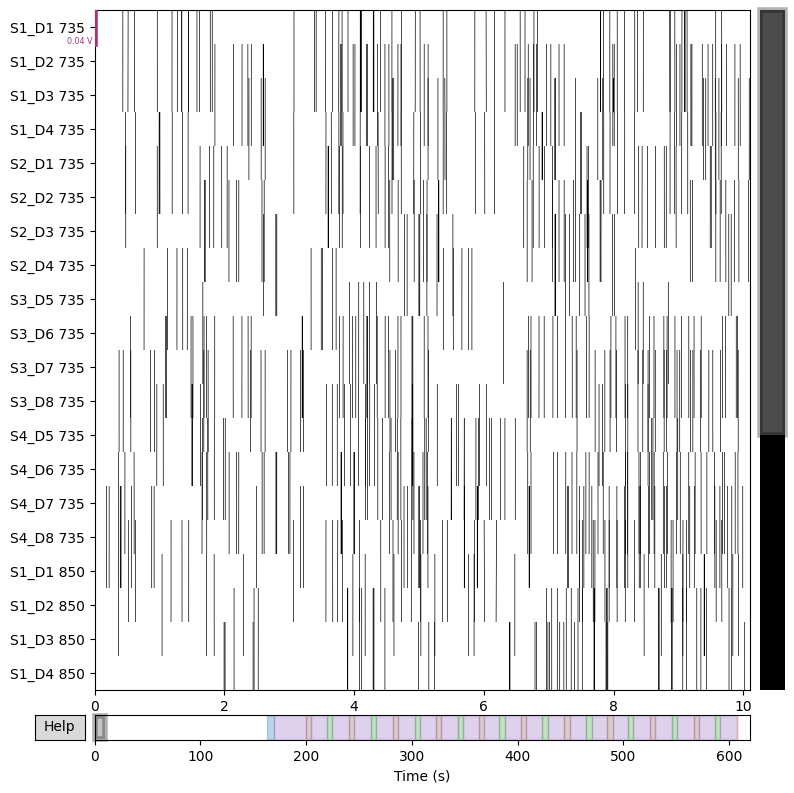

In [133]:
intensity.plot()

Reading 0 ... 6194  =      0.000 ...   619.400 secs...


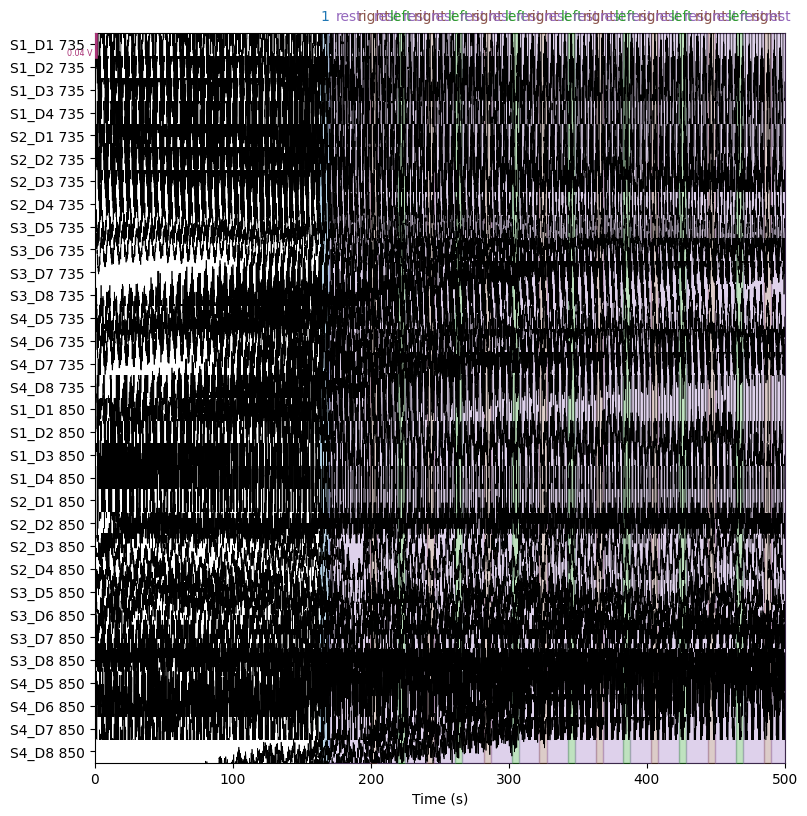

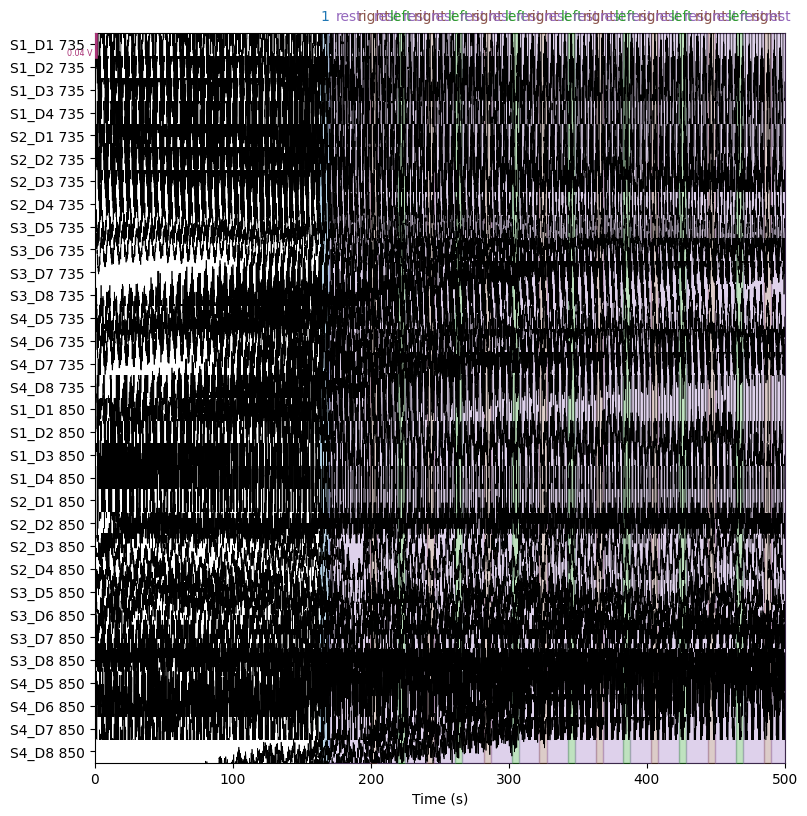

In [89]:
od = mne.preprocessing.nirs.optical_density(intensity)
od.plot(n_channels=len(od.ch_names), duration=500, show_scrollbars=False)

In [166]:
print(conc.info)

<Info | 10 non-empty values
 bads: 20 items (S1_D3 hbo, S1_D4 hbo, S2_D2 hbo, S2_D3 hbo, S2_D4 hbo, ...)
 ch_names: S1_D1 hbo, S1_D2 hbo, S1_D3 hbo, S1_D4 hbo, S2_D1 hbo, S2_D2 ...
 chs: 16 Oxyhemoglobin, 16 Deoxyhemoglobin
 custom_ref_applied: False
 dig: 35 items (3 Cardinal, 32 EEG)
 highpass: 0.1 Hz
 lowpass: 0.7 Hz
 meas_date: 2023-09-20 10:09:35 UTC
 nchan: 32
 projs: []
 sfreq: 10.0 Hz
 subject_info: 1 item (dict)
>


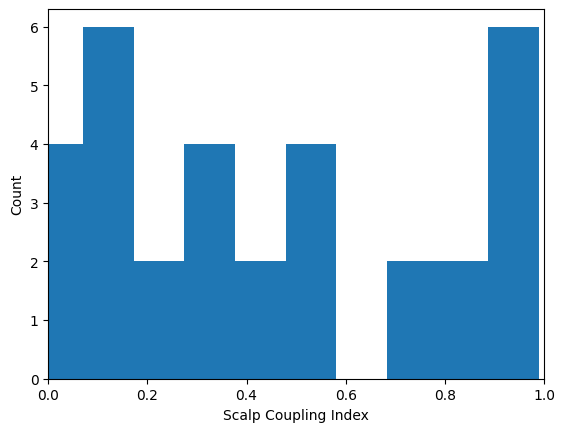

In [103]:
sci = mne.preprocessing.nirs.scalp_coupling_index(od)
fig, ax = plt.subplots()
ax.hist(sci)
ax.set(xlabel="Scalp Coupling Index", ylabel="Count", xlim=[0, 1])
plt.show()

In [106]:
od.info["bads"] = list(compress(od.ch_names, sci < 0.5))

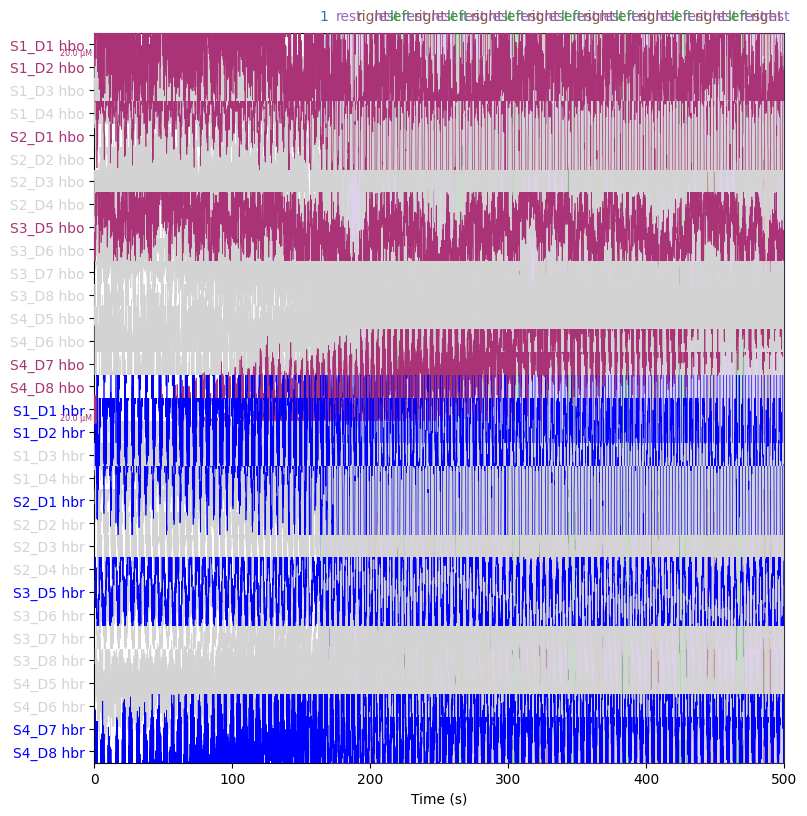

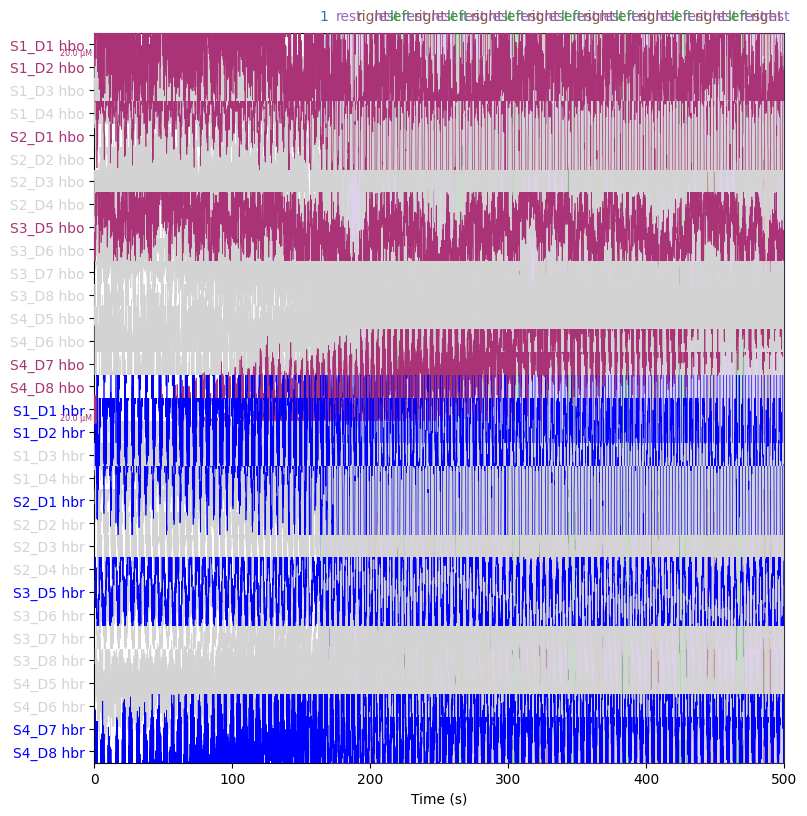

In [107]:
conc = mne.preprocessing.nirs.beer_lambert_law(od, ppf=0.1)
conc.plot(n_channels=len(conc.ch_names), duration=500, show_scrollbars=False)

In [163]:
conc.info

<Info | 10 non-empty values
 bads: 20 items (S1_D3 hbo, S1_D4 hbo, S2_D2 hbo, S2_D3 hbo, S2_D4 hbo, ...)
 ch_names: S1_D1 hbo, S1_D2 hbo, S1_D3 hbo, S1_D4 hbo, S2_D1 hbo, S2_D2 ...
 chs: 16 Oxyhemoglobin, 16 Deoxyhemoglobin
 custom_ref_applied: False
 dig: 35 items (3 Cardinal, 32 EEG)
 highpass: 0.1 Hz
 lowpass: 0.7 Hz
 meas_date: 2023-09-20 10:09:35 UTC
 nchan: 32
 projs: []
 sfreq: 10.0 Hz
 subject_info: 1 item (dict)
>

In [167]:
groups = {
    "left": [],
    "right": []
}

left_substrs = ["S1", "S2"]
right_substrs = ["S3", "S4"]
substr_lists = {"left": left_substrs,
                "right": right_substrs}
for i, ch_name in enumerate(conc.ch_names):
    for cat_name, substr_list in substr_lists.items(): 
        for substr in substr_list:
            if substr in ch_name:
                groups[cat_name].append(ch_name)
                break


group_idxs = {}
for cat, ch_list in groups.items():
    group_idxs[cat] = mne.pick_channels(
    conc.ch_names, ch_list, ordered=True
)

print(groups)
print(group_idxs)

{'left': ['S1_D1 hbo', 'S1_D2 hbo', 'S1_D3 hbo', 'S1_D4 hbo', 'S2_D1 hbo', 'S2_D2 hbo', 'S2_D3 hbo', 'S2_D4 hbo', 'S1_D1 hbr', 'S1_D2 hbr', 'S1_D3 hbr', 'S1_D4 hbr', 'S2_D1 hbr', 'S2_D2 hbr', 'S2_D3 hbr', 'S2_D4 hbr'], 'right': ['S3_D5 hbo', 'S3_D6 hbo', 'S3_D7 hbo', 'S3_D8 hbo', 'S4_D5 hbo', 'S4_D6 hbo', 'S4_D7 hbo', 'S4_D8 hbo', 'S3_D5 hbr', 'S3_D6 hbr', 'S3_D7 hbr', 'S3_D8 hbr', 'S4_D5 hbr', 'S4_D6 hbr', 'S4_D7 hbr', 'S4_D8 hbr']}
{'left': array([ 0,  1,  2,  3,  4,  5,  6,  7, 16, 17, 18, 19, 20, 21, 22, 23]), 'right': array([ 8,  9, 10, 11, 12, 13, 14, 15, 24, 25, 26, 27, 28, 29, 30, 31])}


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.05 - 0.7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.05
- Lower transition bandwidth: 0.02 Hz (-6 dB cutoff frequency: 0.04 Hz)
- Upper passband edge: 0.70 Hz
- Upper transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Filter length: 1651 samples (165.100 s)

Effective window size : 204.800 (s)
Effective window size : 204.800 (s)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/Users/andru/miniforge3/envs/benchnirs_env/lib/python3.8/site-packages/mne/viz/utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
/Users/andru/miniforge3/envs/benchnirs_env/lib/python3.8/site-packages/mne/viz/utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


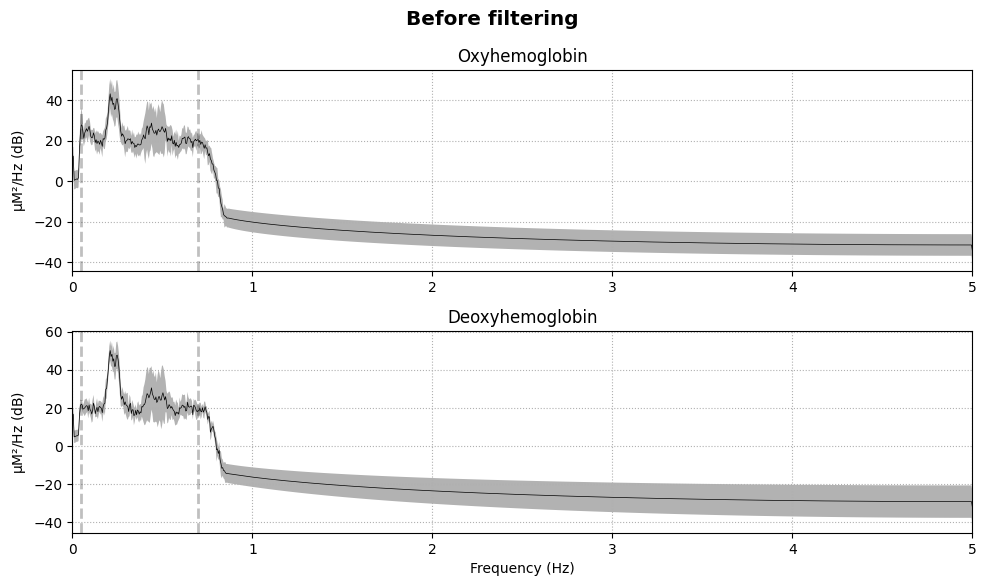

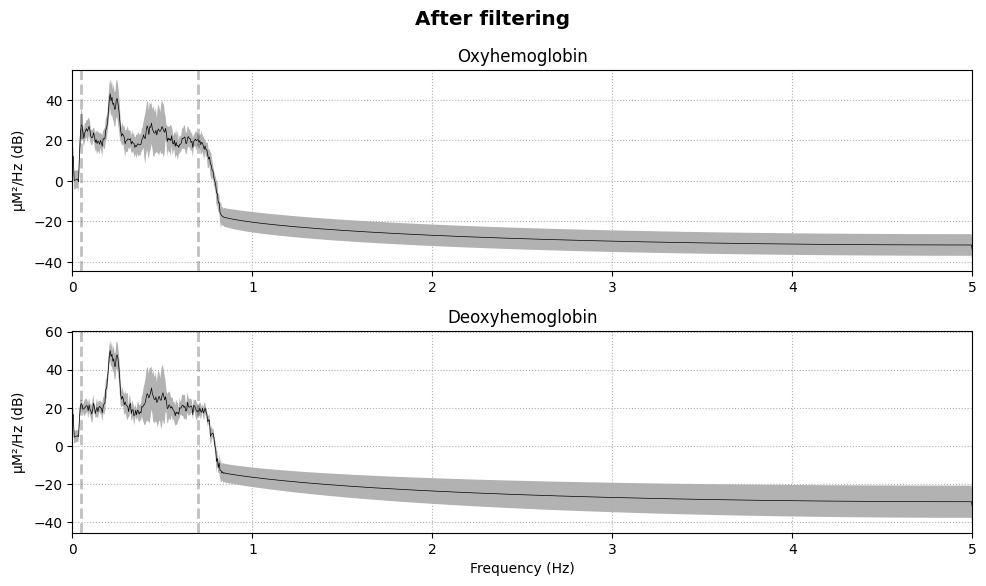

In [115]:
conc_unfiltered = conc.copy()
conc.filter(0.05, 0.7, h_trans_bandwidth=0.2, l_trans_bandwidth=0.02)
for when, _raw in dict(Before=conc_unfiltered, After=conc).items():
    fig = _raw.compute_psd().plot(average=True, picks="data", exclude="bads")
    fig.suptitle(f"{when} filtering", weight="bold", size="x-large")
    fig.subplots_adjust(top=0.88)
plt.show()

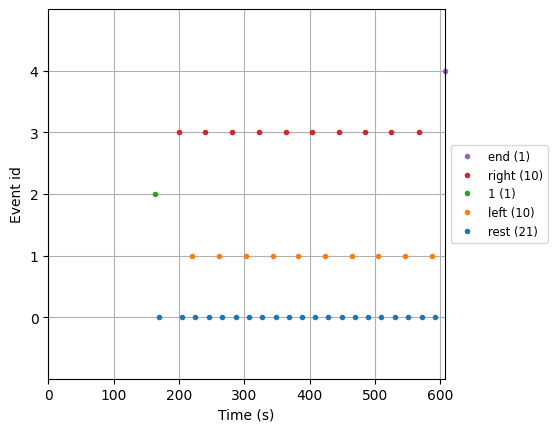

In [116]:
fig = mne.viz.plot_events(events_from_annot, event_id=event_dict, sfreq=conc.info["sfreq"])
fig.subplots_adjust(right=0.7)  # make room for the legend

Not setting metadata
43 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 43 events and 361 original time points ...
2 bad epochs dropped


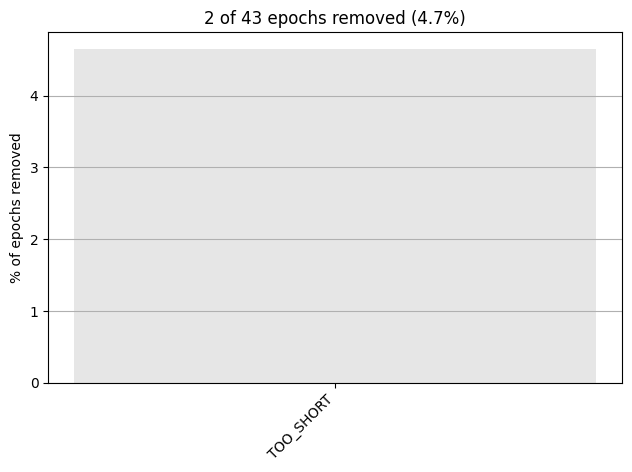

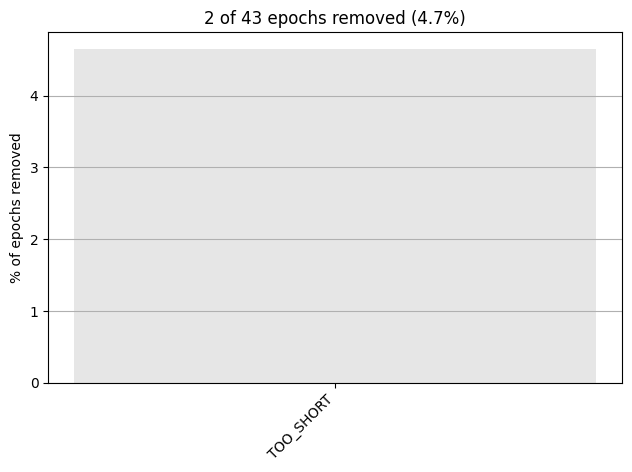

In [182]:
reject_criteria = None#dict(hbo=80e-6)
tmin, tmax = -6, 30

epochs = mne.Epochs(
    conc,
    events_from_annot,
    event_id=event_dict,
    tmin=tmin,
    tmax=tmax,
    reject=reject_criteria,
    reject_by_annotation=True,
    proj=True,
    baseline=None,#(None, 0),
    preload=True,
    detrend=None,
    verbose=True,
)
epochs.plot_drop_log()

In [183]:
group_idxs

{'left': array([ 0,  1,  2,  3,  4,  5,  6,  7, 16, 17, 18, 19, 20, 21, 22, 23]),
 'right': array([ 8,  9, 10, 11, 12, 13, 14, 15, 24, 25, 26, 27, 28, 29, 30, 31])}

In [184]:
epochs["left"].pick(group_idxs["left"])

Number of events,10
Events,left: 10
Time range,-6.000 – 30.000 s
Baseline,off


Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"
combining channels using "mean"


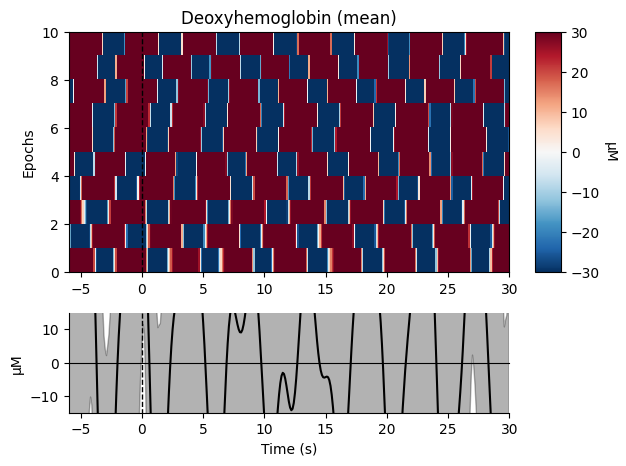

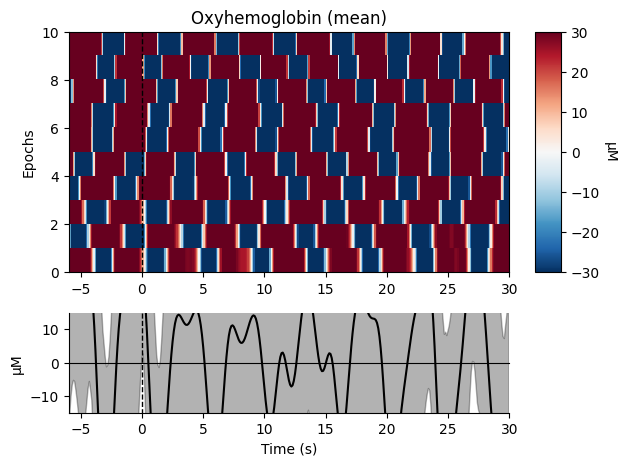

In [192]:
epochs["left"].pick(group_idxs["left"]).plot_image(
    combine="mean",
    vmin=-30,
    vmax=30,
    ts_args=dict(ylim=dict(hbo=[-15, 15], hbr=[-15, 15])),
)
plt.show()

Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"
combining channels using "mean"


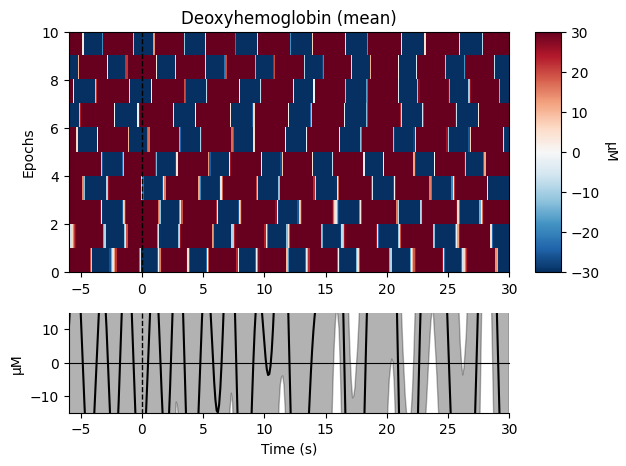

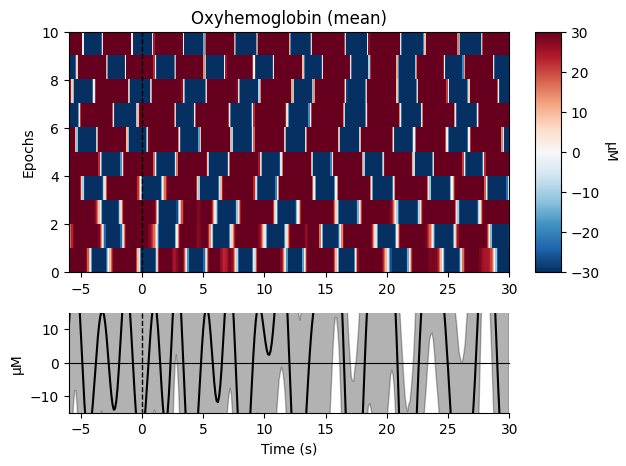

In [191]:
epochs["lef"].pick(group_idxs["left"]).plot_image(
    combine="mean",
    vmin=-30,
    vmax=30,
    ts_args=dict(ylim=dict(hbo=[-15, 15], hbr=[-15, 15])),
)
plt.show()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


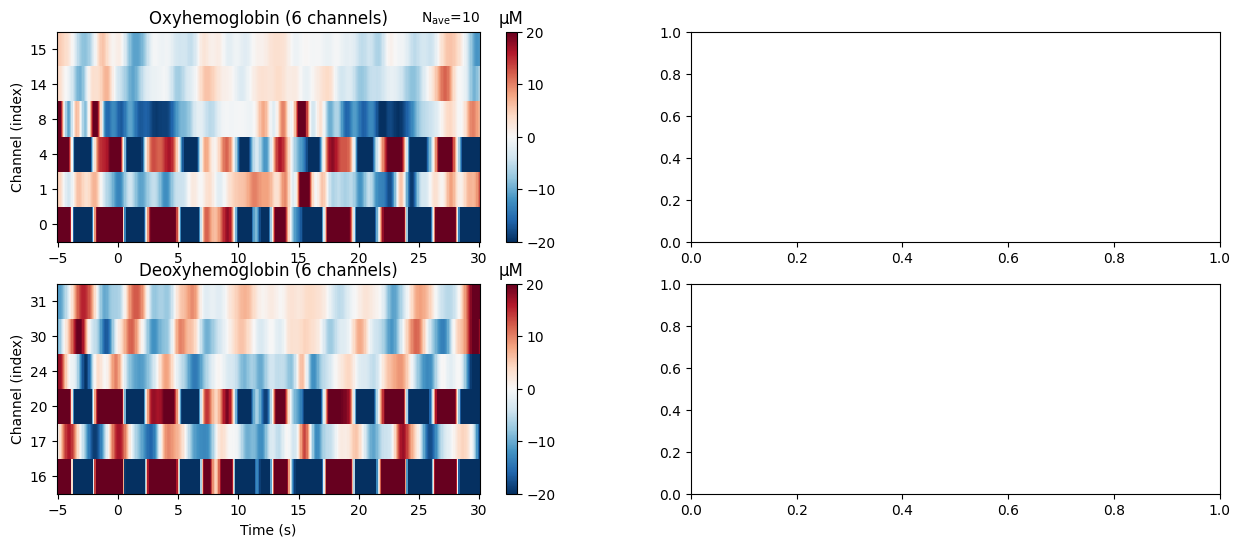

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


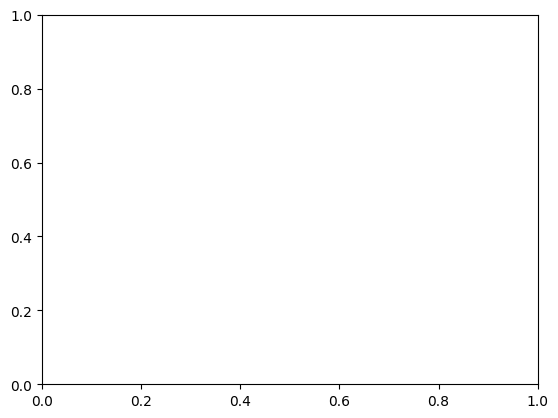

In [181]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 6))
#clims = dict(hbo=[-20, 20], hbr=[-20, 20])
epochs["left"].average().plot_image(axes=axes[:, 0], clim=clims)
epochs["right"].average().plot_image(axes=axes[:, 1], clim=clims)
for column, condition in enumerate(["left", "right"]):
    for ax in axes[:, column]:
        ax.set_title("{}: {}".format(condition, ax.get_title()))